## Reading File 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_csv('./Arquivos/HIST_PAINEL_COVIDBR_04mai2021.csv', sep=';')

<h3 style='color:#ff335f'> Before removing noisy data </h3>

In [3]:
dataFrame

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270941,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-04-30,17,3015268.0,378783,1127,7798,37,NaN,NaN,1.0
2270942,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-05-01,17,3015268.0,379752,969,7826,28,NaN,NaN,1.0
2270943,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-05-02,18,3015268.0,380639,887,7855,29,NaN,NaN,1.0
2270944,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-05-03,18,3015268.0,381468,829,7883,28,NaN,NaN,1.0


## Noisy Data

<span style="color:#3385ff"> **Removing noisy 'regiao' and set index**</span>

In [4]:
# Copy brasil data
dataFrameBrasil = dataFrame[dataFrame['regiao'] == 'Brasil']

# Remove 'Brasil' region
indexNames = dataFrame[dataFrame['regiao'] == 'Brasil'].index
dataFrame.drop(indexNames, inplace=True)

dataFrame.set_index('regiao', inplace=True)

<span style='color:#3385ff'> **Removing noisy 'municipio'** </span>

In [5]:
dataFrame['municipio'].isnull().sum()

20229

In [6]:
dataFrame['municipio'].fillna('NI',inplace=True)

In [7]:
dataFrame['municipio'].isnull().sum()

0

<span style='color:#3385ff'> **Removing noisy 'codRegiaoSaude'** </span>

In [8]:
dataFrame['nomeRegiaoSaude'].isnull().sum()

20229

In [9]:
dataFrame['nomeRegiaoSaude'].fillna('NI', inplace=True)

In [10]:
dataFrame['nomeRegiaoSaude'].isnull().sum()

0

<span style='color:#3385ff'> **Removing noisy 'populacaoTCU2019'** </span>

In [11]:
dataFrame['populacaoTCU2019'].isnull().sum()

8484

In [12]:
dataFrame['populacaoTCU2019'].fillna(0, inplace=True)

In [13]:
dataFrame['populacaoTCU2019'].isnull().sum()

0

 <span style='color:#3385ff'> **Removing noisy 'Recuperadosnovos' and 'emAcompanhamentoNovos'** </span>

In [14]:
dataFrame['Recuperadosnovos'].notna().sum()

0

In [15]:
dataFrame['emAcompanhamentoNovos'].notna().sum()

0

In [16]:
del dataFrame['Recuperadosnovos']
del dataFrame['emAcompanhamentoNovos']

 <span style='color:#3385ff'> **Remove column useless** </span>

In [17]:
del dataFrame['coduf']
del dataFrame['codRegiaoSaude']
del dataFrame['codmun']
del dataFrame['semanaEpi']
del dataFrame['interior/metropolitana']

 <h3 style='color:#ff335f'> After removing noisy data </h3>

In [18]:
dataFrame.isnull().sum()

estado              0
municipio           0
nomeRegiaoSaude     0
data                0
populacaoTCU2019    0
casosAcumulado      0
casosNovos          0
obitosAcumulado     0
obitosNovos         0
dtype: int64

In [19]:
dataFrame

,estado,municipio,nomeRegiaoSaude,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
regiao,,,,,,,,,
Norte,RO,NI,NI,2020-02-25,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-26,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-27,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-28,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-29,1777225.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-04-30,3015268.0,378783,1127,7798,37
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-05-01,3015268.0,379752,969,7826,28
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-05-02,3015268.0,380639,887,7855,29


## Data Visualization 

In [20]:
estados = dataFrame.groupby('estado')
estados.size()

estado
AC      9323
AL     42047
AM     25483
AP      6899
BA    169307
CE     75175
DF       839
ES     32351
GO    100223
MA     88507
MG    345451
MS     32351
MT     57803
PA     58611
PB     90931
PE     75579
PI     91335
PR    162035
RJ     38007
RN     68307
RO     21847
RR      6899
RS    201627
SC    120019
SE     31139
SP    261419
TO     56995
dtype: int64

<AxesSubplot:xlabel='estado'>

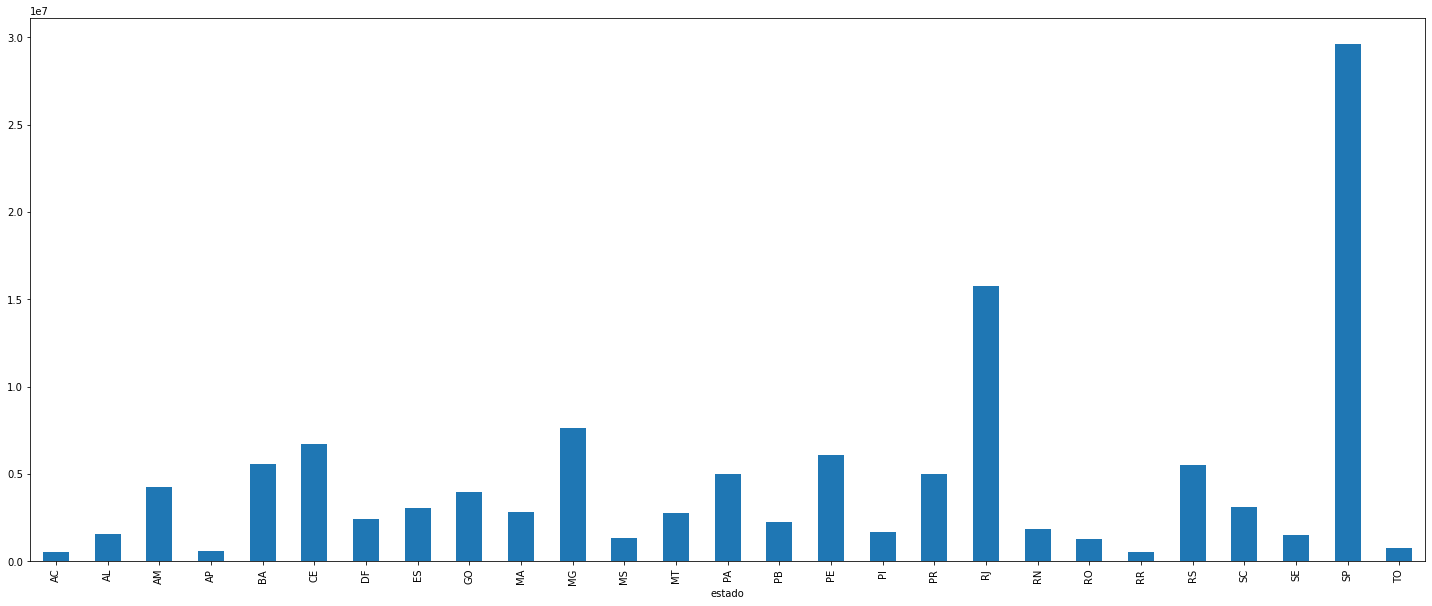

In [35]:
a = estados['obitosAcumulado'].sum()
a.plot.bar(figsize=(25,10))

## Data Analyzing

In [21]:
dataFrame

,estado,municipio,nomeRegiaoSaude,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
regiao,,,,,,,,,
Norte,RO,NI,NI,2020-02-25,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-26,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-27,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-28,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-29,1777225.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-04-30,3015268.0,378783,1127,7798,37
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-05-01,3015268.0,379752,969,7826,28
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-05-02,3015268.0,380639,887,7855,29


In [22]:
temp = dataFrame[dataFrame['data'] == '2021-05-01']
temp.reset_index()

,regiao,estado,municipio,nomeRegiaoSaude,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,Norte,RO,NI,NI,2021-05-01,1777225.0,213117,379,5181,18
1,Norte,AC,NI,NI,2021-05-01,881935.0,78016,213,1534,5
2,Norte,AM,NI,NI,2021-05-01,4144597.0,371306,530,12636,9
3,Norte,RR,NI,NI,2021-05-01,605761.0,96576,260,1513,5
4,Norte,PA,NI,NI,2021-05-01,8602865.0,472986,1427,13083,102
...,...,...,...,...,...,...,...,...,...,...
5613,Centro-Oeste,GO,Vianópolis,CENTRO SUL,2021-05-01,13863.0,606,0,16,0
5614,Centro-Oeste,GO,Vicentinópolis,CENTRO SUL,2021-05-01,8743.0,1056,6,18,1
5615,Centro-Oeste,GO,Vila Boa,ENTORNO NORTE,2021-05-01,6171.0,124,1,4,0
5616,Centro-Oeste,GO,Vila Propício,SAO PATRICIO II,2021-05-01,5821.0,313,0,3,0


In [23]:
temp = temp.groupby('estado')

In [24]:
temp.describe()

populacaoTCU2019                                                     \
                  count          mean           std        min         25%   
estado                                                                       
AC                 23.0  7.669000e+04  1.937661e+05     6540.0    11857.50   
AL                104.0  6.417994e+04  3.395012e+05        0.0     8901.00   
AM                 63.0  1.315745e+05  5.812474e+05     2755.0    17382.50   
AP                 17.0  9.949776e+04  2.264511e+05     5120.0     7780.00   
BA                419.0  7.099315e+04  7.394553e+05        0.0    11290.50   
CE                186.0  9.819439e+04  6.947451e+05        0.0    14128.25   
DF                  2.0  3.015268e+06  0.000000e+00  3015268.0  3015268.00   
ES                 80.0  1.004662e+05  4.542576e+05        0.0    12216.00   
GO                248.0  5.659963e+04  4.570664e+05        0.0     3527.25   
MA                219.0  6.461353e+04  4.824249e+05        0.0    11334.50   
MG                855.0  4.951764e+04  7.300661e+05        0.0     4841.00   
MS                 80.0  6.947465e+04  3.233781e+05     3051.0     7869.00   
MT                143.0  4.873379e+04  2.956415e+05        0.0     5115.00   
PA                145.0  1.186602e+05  7.221429e+05     3286.0    18193.00   
PB                225.0  3.571668e+04  2.736568e+05        0.0     4521.00   
PE                187.0  1.022147e+05  7.088105e+05        0.0    14431.00   
PI                226.0  2.896661e+04  2.245539e+05        0.0     4501.00   
PR                401.0  5.702722e+04  5.799274e+05        0.0     4935.00   
RJ                 94.0  3.673392e+05  1.898183e+06        0.0    18672.25   
RN                169.0  4.150122e+04  2.782420e+05        0.0     4467.00   
RO                 54.0  6.582315e+04  2.485184e+05        0.0     7485.00   
RR                 17.0  7.126600e+04  1.664895e+05        0.0    10559.00   
RS                499.0  4.560016e+04  5.146330e+05        0.0     2931.50   
SC                297.0  4.824773e+04  4.185025e+05        0.0     3642.00   
SE                 77.0  5.970639e+04  2.698395e+05        0.0     7625.00   
SP                647.0  1.419445e+05  1.869123e+06        0.0     5729.50   
TO                141.0  2.231016e+04  1.349388e+05        0.0     3333.00   

                                          casosAcumulado                 ...  \
              50%         75%         max          count           mean  ...   
estado                                                                   ...   
AC        18930.0    30529.00    881935.0           23.0    6784.000000  ...   
AL        17633.5    26091.00   3337357.0          104.0    3355.307692  ...   
AM        25644.0    40363.00   4144597.0           63.0   11787.492063  ...   
AP        16502.0    27270.00    845731.0           17.0   12467.176471  ...   
BA        17113.0    28405.50  14873064.0          419.0    4320.348449  ...   
CE        21999.5    41549.75   9132078.0          186.0    7281.204301  ...   
DF      3015268.0  3015268.00   3015268.0            2.0  379752.000000  ...   
ES        20271.5    31759.75   4018650.0           80.0   10945.325000  ...   
GO         7606.5    19155.25   7018354.0          248.0    4455.330645  ...   
MA        18625.0    31142.00   7075181.0          219.0    2443.360731  ...   
MG         8151.0    17892.50  21168791.0          855.0    3196.729825  ...   
MS        15800.0    25349.75   2778986.0           80.0    6225.825000  ...   
MT        10847.0    20713.50   3484466.0          143.0    5051.874126  ...   
PA        31597.0    58986.00   8602865.0          145.0    6523.944828  ...   
PB         7301.0    15376.00   4018127.0          225.0    2610.817778  ...   
PE        22972.0    38785.00   9557071.0          187.0    4371.796791  ...   
PI         6246.5    10765.75   3273227.0          226.0    2131.575221  ...   
PR         9615.0    18980.00  11433957.0          401.0    4747.5

In [25]:
temp['casosAcumulado'].sum()

estado
AC     156032
AL     348952
AM     742612
AP     211942
BA    1810226
CE    1354304
DF     759504
ES     875626
GO    1104922
MA     535096
MG    2733204
MS     498066
MT     722418
PA     945972
PB     587434
PE     817526
PI     481736
PR    1903764
RJ    1490912
RN     448490
RO     426234
RR     193152
RS    1959614
SC    1781154
SE     406072
SP    5836088
TO     320898
Name: casosAcumulado, dtype: int64

<AxesSubplot:xlabel='estado'>

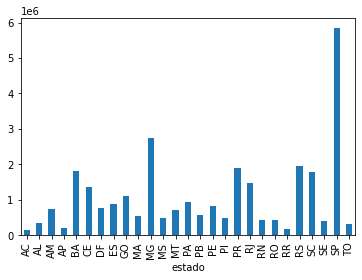

In [26]:
a = temp['casosAcumulado'].sum()
a.plot.bar()
# plt.show()